In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as pyplot

In [26]:
df = pd.read_csv('synthetic_fatigue_data_adaptive.csv')

In [6]:
df.shape

(1048575, 15)

In [7]:
df.columns

Index(['cycle', 'mean_amplitude', 'load', 'median_strain', 'pzt_amplitude_std',
       'pzt_energy_mean', 'pzt_rms_mean', 'strain_mean_of_means',
       'strain_std_of_means', 'rho_micro', 'D_macro', 'rho_smooth', 'D_smooth',
       'RUL', 'coupon_id'],
      dtype='object')

In [27]:
df_L1 = df[df['coupon_id'].str.startswith('L1')]

In [28]:
df_L1.head(5)

cycle  mean_amplitude          load  median_strain  pzt_amplitude_std  \
657003      0     1575.494800  0.000000e+00       0.000540         488.003300   
657004      1     1321.217800  4.750000e-16       0.002275         517.722300   
657005      2     1139.100660  1.344402e-01       0.003510         538.939977   
657006      3     1020.767543  3.861638e-01       0.004300         552.644143   
657007      4      957.842615  7.380142e-01       0.004706         559.822607   

        pzt_energy_mean  pzt_rms_mean  strain_mean_of_means  \
657003      327762300.0    376.629880              0.000554   
657004      251121340.0    322.461500              0.001729   
657005      196178821.2    283.571314              0.002565   
657006      160416834.5    258.186943              0.003099   
657007      141317470.8    244.536005              0.003373   

        strain_std_of_means  rho_micro   D_macro  rho_smooth  D_smooth  \
657003             0.000545   0.000000  1.000000    0.000000  1.000000   
657004             0.000999   0.161395  0.237196    0.107597  0.491464   
657005             0.001322   0.276989 -0.304647    0.185598  0.125365   
657006             0.001529   0.352097 -0.651219    0.237430 -0.114804   
657007             0.001635   0.392037 -0.828209    0.266516 -0.245550   

           RUL coupon_id  
657003  227000    L1_S11  
657004  226999    L1_S11  
657005  226998    L1_S11  
657006  226997    L1_S11  
657007  226996    L1_S11

In [12]:
df_L1

mean_amplitude          load  median_strain  pzt_amplitude_std  \
657003      1575.494800  0.000000e+00       0.000540         488.003300   
657004      1321.217800  4.750000e-16       0.002275         517.722300   
657005      1139.100660  1.344402e-01       0.003510         538.939977   
657006      1020.767543  3.861638e-01       0.004300         552.644143   
657007       957.842615  7.380142e-01       0.004706         559.822607   
...                 ...           ...            ...                ...   
1048570      568.160115  3.631803e+00       0.001853         367.385856   
1048571      568.270450  3.632730e+00       0.001852         367.415956   
1048572      568.380758  3.633657e+00       0.001851         367.446049   
1048573      568.491040  3.634584e+00       0.001850         367.476135   
1048574      568.601294  3.635510e+00       0.001849         367.506213   

         pzt_energy_mean  pzt_rms_mean  strain_mean_of_means  \
657003      3.277623e+08    376.629880              0.000554   
657004      2.511213e+08    322.461500              0.001729   
657005      1.961788e+08    283.571314              0.002565   
657006      1.604168e+08    258.186943              0.003099   
657007      1.413175e+08    244.536005              0.003373   
...                  ...           ...                   ...   
1048570     5.445370e+07    141.639482              0.001523   
1048571     5.447809e+07    141.658794              0.001522   
1048572     5.450248e+07    141.678101              0.001522   
1048573     5.452686e+07    141.697404              0.001521   
1048574     5.455123e+07    141.716701              0.001520   

         strain_std_of_means  rho_micro   D_macro  rho_smooth  D_smooth  \
657003              0.000545   0.000000  1.000000    0.000000  1.000000   
657004              0.000999   0.161395  0.237196    0.107597  0.491464   
657005              0.001322   0.276989 -0.304647    0.185598  0.125365   
657006              0.001529   0.352097 -0.651219    0.237430 -0.114804   
657007              0.001635   0.392037 -0.828209    0.266516 -0.245550   
...                      ...        ...       ...         ...       ...   
1048570             0.000968   0.628034  0.642427    0.568204  0.691298   
1048571             0.000968   0.627956  0.642817    0.568160  0.691492   
1048572             0.000968   0.627878  0.643207    0.568116  0.691686   
1048573             0.000968   0.627801  0.643596    0.568071  0.691879   
1048574             0.000968   0.627723  0.643986    0.568027  0.692073   

            RUL coupon_id  
657003   227000    L1_S11  
657004   226999    L1_S11  
657005   226998    L1_S11  
657006   226997    L1_S11  
657007   226996    L1_S11  
...         ...       ...  
1048570   60435    L1_S12  
1048571   60434    L1_S12  
1048572   60433    L1_S12  
1048573   60432    L1_S12  
1048574   60431    L1_S12  

[391572 rows x 14 columns]

In [29]:
import pandas as pd

def compute_corr(df, label="Lx"):
    corr = df.corr(numeric_only=True)['RUL'].sort_values(ascending=False)
    print(f"\nTop correlations for {label}:")
    print(corr.head(10))
    print("\nLowest correlations for {label}:")
    print(corr.tail(10))
    return corr

corr_L1 = compute_corr(df_L1, "L1")
# corr_L2 = compute_corr(df_L2, "L2")
# corr_L3 = compute_corr(df_L3, "L3")



Top correlations for L1:
RUL                     1.000000
strain_std_of_means     0.398353
pzt_amplitude_std       0.395801
mean_amplitude          0.393518
strain_mean_of_means    0.382459
pzt_energy_mean         0.340618
rho_smooth              0.316660
D_smooth                0.154668
D_macro                 0.148218
pzt_rms_mean           -0.101884
Name: RUL, dtype: float64

Lowest correlations for {label}:
strain_mean_of_means    0.382459
pzt_energy_mean         0.340618
rho_smooth              0.316660
D_smooth                0.154668
D_macro                 0.148218
pzt_rms_mean           -0.101884
median_strain          -0.123047
load                   -0.331216
rho_micro              -0.384036
cycle                  -0.613269
Name: RUL, dtype: float64


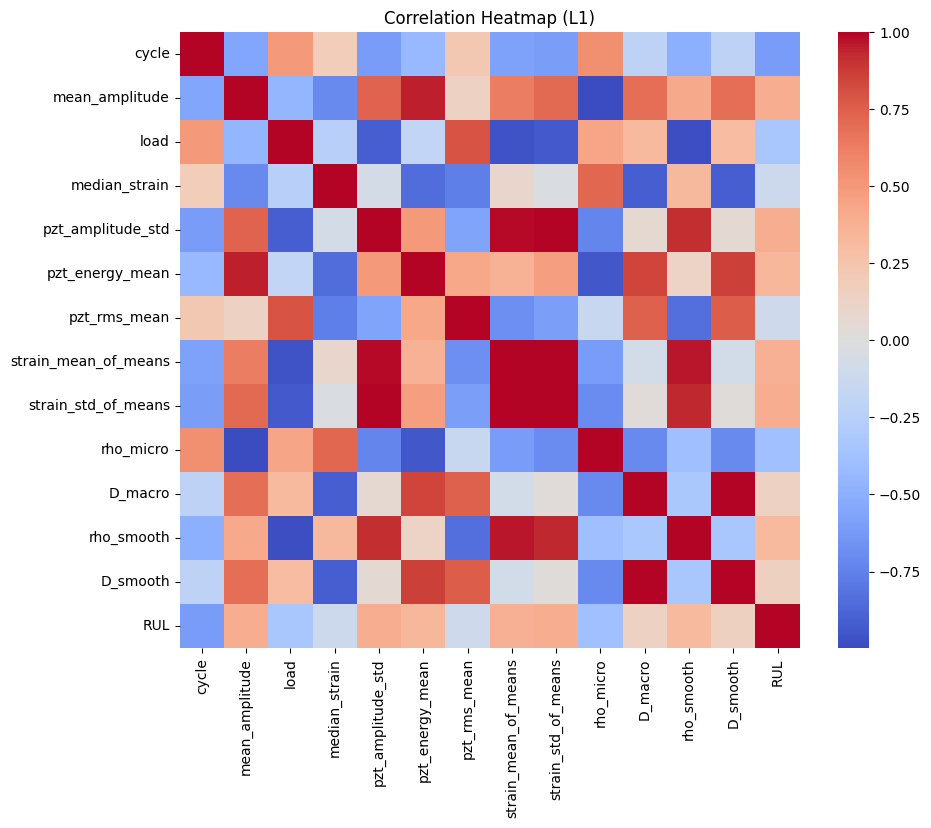

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_corr(df, label):
    plt.figure(figsize=(10,8))
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, cmap='coolwarm', annot=False, center=0)
    plt.title(f"Correlation Heatmap ({label})")
    plt.show()

plot_corr(df_L1, "L1")
# plot_corr(df_L2, "L2")
# plot_corr(df_L3, "L3")


In [18]:
import numpy as np

def redundant_features(df, threshold=0.9):
    corr_matrix = df.corr(numeric_only=True).abs()
    
    # Use np (not pd.np)
    upper = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print(f"Highly correlated (redundant) features (> {threshold}):\n", to_drop)
    return to_drop


redundant_L1 = redundant_features(df_L1)
# redundant_L2 = redundant_features(df_L2)
# redundant_L3 = redundant_features(df_L3)


Highly correlated (redundant) features (> 0.9):
 ['pzt_amplitude_std', 'pzt_energy_mean', 'strain_mean_of_means', 'strain_std_of_means', 'rho_micro', 'D_macro', 'rho_smooth', 'D_smooth']


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

def feature_importance(df, label):
    # Keep only numeric columns
    df = df.select_dtypes(include=[np.number])
    
    # Drop rows with NaNs (or you can fillna(df.median()))
    df = df.dropna()
    
    X = df.drop(columns=['RUL'])
    y = df['RUL']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
    model.fit(X_train_scaled, y_train)
    
    importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    
    print(f"\nTop 10 Feature Importances for {label}:")
    print(importance.head(10))
    
    return importance

In [23]:
importance_L1 = feature_importance(df_L1, "L1")


Top 10 Feature Importances for L1:
strain_mean_of_means    0.296832
median_strain           0.238492
pzt_amplitude_std       0.178766
D_smooth                0.116377
strain_std_of_means     0.068143
load                    0.035905
D_macro                 0.030115
pzt_energy_mean         0.012971
rho_smooth              0.009002
rho_micro               0.008661
dtype: float64


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# Select top 6 features
top_features_L1 = ['strain_mean_of_means', 'median_strain', 'pzt_amplitude_std',
                   'D_smooth', 'strain_std_of_means', 'load']

# Prepare subset
df_L1_compact = df_L1[top_features_L1 + ['RUL']].dropna()

X = df_L1_compact.drop(columns=['RUL'])
y = df_L1_compact['RUL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
model_L1 = RandomForestRegressor(n_estimators=150, max_depth=10, random_state=42, n_jobs=-1)
model_L1.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model_L1.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"L1 Model Performance:\nRMSE: {rmse:.3f} | MAE: {mae:.3f} | R²: {r2:.3f}")

L1 Model Performance:
RMSE: 4388.237 | MAE: 2189.087 | R²: 0.994


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
df_L1[top_features_L1 + ['RUL']].corr()['RUL'].sort_values(ascending=False)

RUL                     1.000000
strain_std_of_means     0.398353
pzt_amplitude_std       0.395801
strain_mean_of_means    0.382459
D_smooth                0.154668
median_strain          -0.123047
load                   -0.331216
Name: RUL, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from xgboost import XGBRegressor
import pandas as pd

# 1. Select features + target
features = ['cycle', 'strain_mean_of_means', 'median_strain',
            'pzt_amplitude_std', 'D_smooth', 'strain_std_of_means', 'load']

df_L1_model = df_L1[features + ['RUL']].dropna()

X = df_L1_model.drop(columns=['RUL'])
y = df_L1_model['RUL']

# 2. Time-based split (80% early cycles for training)
df_L1_model = df_L1_model.sort_values('cycle')
split_idx = int(len(df_L1_model) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# 3. Scale features except cycle (cycle is already numeric and meaningful)
scale_cols = [c for c in X.columns if c != 'cycle']
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test_scaled = X_test.copy()
X_test_scaled[scale_cols] = scaler.transform(X_test[scale_cols])

# 4. Train XGBoost model
model_L1_cycle = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model_L1_cycle.fit(X_train_scaled, y_train)

# 5. Evaluate
y_pred = model_L1_cycle.predict(X_test_scaled)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Cycle-Aware L1 Model → RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.3f}")

Cycle-Aware L1 Model → RMSE: 92849.81, MAE: 77959.91, R²: -7.186


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Cycle-Aware Normalized L1 Model:
RMSE: 151417.89 | MAE: 143847.96 | R²: -43.859


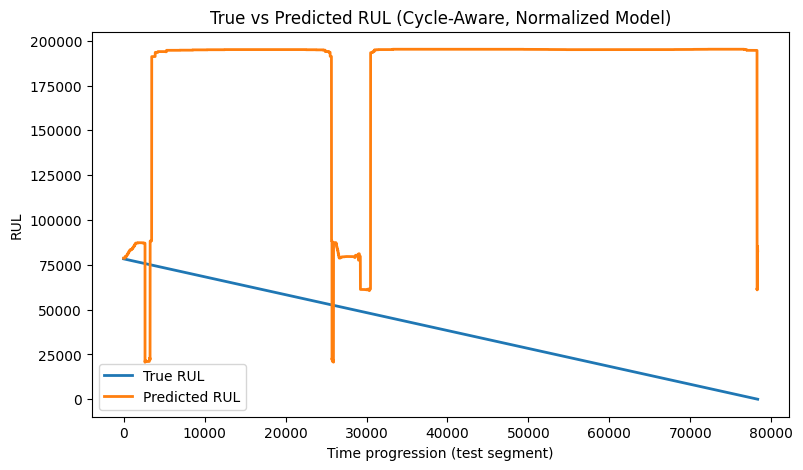

In [33]:
# === Imports ===
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import HistGradientBoostingRegressor
import matplotlib.pyplot as plt

# === 1. Select features ===
features = [
    'cycle',
    'strain_mean_of_means',
    'median_strain',
    'pzt_amplitude_std',
    'D_smooth',
    'strain_std_of_means',
    'load'
]

df_L1_model = df_L1[features + ['RUL']].dropna().sort_values('cycle')

# === 2. Time-based split ===
split_idx = int(len(df_L1_model) * 0.8)
train = df_L1_model.iloc[:split_idx]
test  = df_L1_model.iloc[split_idx:]

X_train = train.drop(columns=['RUL'])
y_train = train['RUL']
X_test  = test.drop(columns=['RUL'])
y_test  = test['RUL']

# === 3. Normalize target (for stability) ===
y_max = y_train.max()
y_train_scaled = y_train / y_max
y_test_scaled  = y_test / y_max

# === 4. Scale numeric features except cycle ===
scale_cols = [c for c in X_train.columns if c != 'cycle']
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()
X_train_scaled[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test_scaled[scale_cols]  = scaler.transform(X_test[scale_cols])

# === 5. Train HistGradientBoostingRegressor ===
model_L1_cycle = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=6,
    max_iter=400,
    l2_regularization=1.0,
    random_state=42
)
model_L1_cycle.fit(X_train_scaled, y_train_scaled)

# === 6. Evaluate (back-transform RUL) ===
y_pred_scaled = model_L1_cycle.predict(X_test_scaled)
y_pred = y_pred_scaled * y_max

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"Cycle-Aware Normalized L1 Model:")
print(f"RMSE: {rmse:.2f} | MAE: {mae:.2f} | R²: {r2:.3f}")

# === 7. Plot ===
plt.figure(figsize=(9,5))
plt.plot(y_test.values, label='True RUL', linewidth=2)
plt.plot(y_pred, label='Predicted RUL', linewidth=2)
plt.xlabel("Time progression (test segment)")
plt.ylabel("RUL")
plt.title("True vs Predicted RUL (Cycle-Aware, Normalized Model)")
plt.legend()
plt.show()

In [34]:
print("RUL range:", df_L1["RUL"].min(), "to", df_L1["RUL"].max())

RUL range: 0 to 227000


In [35]:
print("Train RUL mean:", y_train.mean(), "Test RUL mean:", y_test.mean())


Train RUL mean: 107530.63101542823 Test RUL mean: 39157.0


In [36]:
from sklearn.model_selection import ShuffleSplit
splitter = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_idx, test_idx in splitter.split(df_L1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


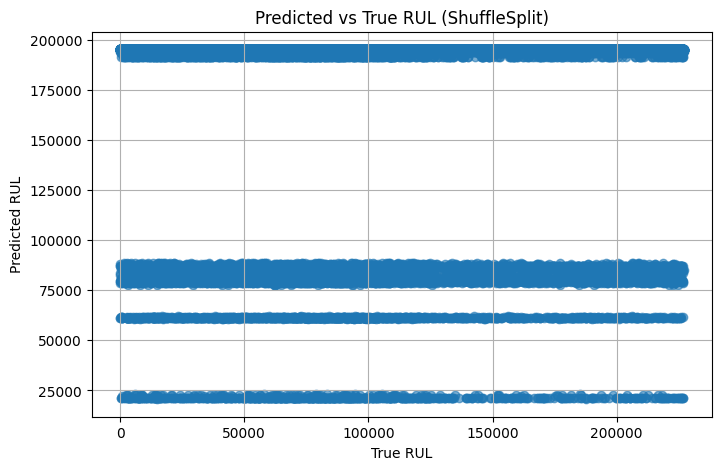

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("Predicted vs True RUL (ShuffleSplit)")
plt.grid(True)
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Store results for all 5 splits
rmse_list, mae_list, r2_list = [], [], []

for train_idx, test_idx in splitter.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Scale all features (including cycle) except coupon_id if present
    numeric_cols = X_train.select_dtypes(include=[np.number]).columns
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
    X_test_scaled  = scaler.transform(X_test[numeric_cols])

    # Train model
    model = HistGradientBoostingRegressor(
        learning_rate=0.05,
        max_depth=6,
        max_iter=400,
        l2_regularization=1.0,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae  = mean_absolute_error(y_test, y_pred)
    r2   = r2_score(y_test, y_pred)

    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

# Print averaged results
print(f"Average RMSE: {np.mean(rmse_list):.2f}")
print(f"Average MAE : {np.mean(mae_list):.2f}")
print(f"Average R²  : {np.mean(r2_list):.3f}")

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: '

Average RMSE: 578.39
Average MAE : 199.66
Average R²  : 1.000


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
# sort by cycle first
df_sorted = df_L1.sort_values("cycle")
split_idx = int(len(df_sorted) * 0.8)
train = df_sorted.iloc[:split_idx]
test  = df_sorted.iloc[split_idx:]

X_train, y_train = train.drop(columns=["RUL"]), train["RUL"]
X_test,  y_test  = test.drop(columns=["RUL"]),  test["RUL"]

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

scaler = StandardScaler()
num_cols = X_train.select_dtypes("number").columns
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_test_scaled  = scaler.transform(X_test[num_cols])

model = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=6,
    max_iter=400,
    random_state=42
)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
print(f"Time-based split → RMSE:{rmse:.2f}, MAE:{mae:.2f}, R²:{r2:.3f}")


Time-based split → RMSE:80685.37, MAE:68298.17, R²:-11.737


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [40]:
df_L1 = df_L1.sort_values('cycle')
for col in ['strain_mean_of_means', 'pzt_amplitude_std', 'D_smooth']:
    df_L1[f'{col}_delta'] = df_L1[col].diff()

In [41]:
df_L1['cycle_window'] = (df_L1['cycle']//50)*50
agg = df_L1.groupby('cycle_window').agg({
    'strain_mean_of_means': ['mean','std'],
    'pzt_amplitude_std': ['mean','std'],
    'D_smooth': ['mean','std'],
    'RUL': 'mean'
})
agg.columns = ['_'.join(c) for c in agg.columns]
agg = agg.reset_index()


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# ===== Select updated features =====
# (replace column names below with your actual new ones if different)
feature_cols = [
    'cycle_window',                     # windowed cycle
    'strain_mean_of_means_mean',        # or whatever your groupby created
    'pzt_amplitude_std_mean',
    'D_smooth_mean',
    'strain_mean_of_means_delta',       # newly created delta features
    'pzt_amplitude_std_delta',
    'D_smooth_delta'
]

df_ready = agg[feature_cols + ['RUL_mean']].dropna()
X = df_ready.drop(columns=['RUL_mean'])
y = df_ready['RUL_mean']

# ===== Split chronologically =====
split_idx = int(len(df_ready) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# ===== Scale =====
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ===== Model =====
model = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=6,
    max_iter=400,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# ===== Evaluate =====
y_pred = model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"Window + Delta Model → RMSE:{rmse:.2f}, MAE:{mae:.2f}, R²:{r2:.3f}")

# ===== Plot =====
plt.figure(figsize=(8,5))
plt.plot(y_test.values, label='True RUL', linewidth=2)
plt.plot(y_pred, label='Pred RUL', linewidth=2)
plt.xlabel('Window Index')
plt.ylabel('RUL')
plt.title('True vs Pred RUL – Window + Delta Features')
plt.legend()
plt.show()


KeyError: "['strain_mean_of_means_delta', 'pzt_amplitude_std_delta', 'D_smooth_delta'] not in index"

In [43]:
print(agg.columns.tolist())


['cycle_window', 'strain_mean_of_means_mean', 'strain_mean_of_means_std', 'pzt_amplitude_std_mean', 'pzt_amplitude_std_std', 'D_smooth_mean', 'D_smooth_std', 'RUL_mean']


Windowed Model → RMSE:25341.16, MAE:22067.81, R²:-2.739


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


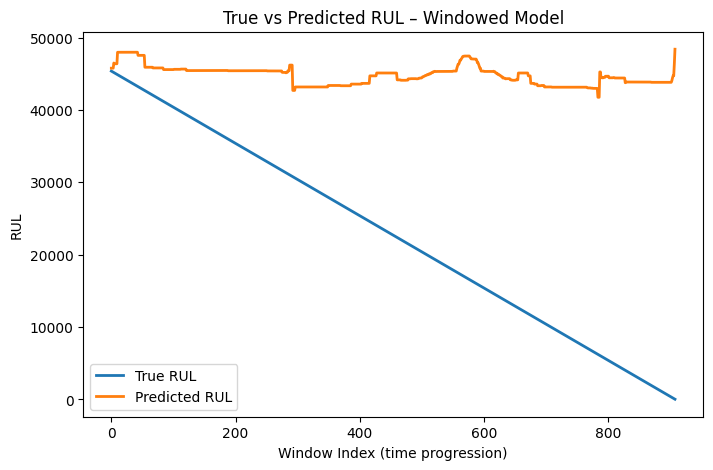

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# ====== Step 1: Define features ======
feature_cols = [
    'cycle_window',
    'strain_mean_of_means_mean',
    'pzt_amplitude_std_mean',
    'D_smooth_mean',
    'strain_mean_of_means_std',
    'pzt_amplitude_std_std',
    'D_smooth_std'
]

df_ready = agg[feature_cols + ['RUL_mean']].dropna()

X = df_ready[feature_cols]
y = df_ready['RUL_mean']

# ====== Step 2: Time-based split ======
split_idx = int(len(df_ready) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# ====== Step 3: Scale features ======
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ====== Step 4: Model ======
model = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=6,
    max_iter=400,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# ====== Step 5: Evaluate ======
y_pred = model.predict(X_test_scaled)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"Windowed Model → RMSE:{rmse:.2f}, MAE:{mae:.2f}, R²:{r2:.3f}")

# ====== Step 6: Plot ======
plt.figure(figsize=(8,5))
plt.plot(y_test.values, label='True RUL', linewidth=2)
plt.plot(y_pred, label='Predicted RUL', linewidth=2)
plt.xlabel("Window Index (time progression)")
plt.ylabel("RUL")
plt.title("True vs Predicted RUL – Windowed Model")
plt.legend()
plt.show()


In [45]:
# make sure agg is sorted by cycle_window
agg = agg.sort_values("cycle_window")

for col in ["strain_mean_of_means_mean",
            "pzt_amplitude_std_mean",
            "D_smooth_mean"]:
    agg[f"{col}_delta"] = agg[col].diff()

Window + Δ Model → RMSE:30844.83, MAE:26234.56, R²:-4.539


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


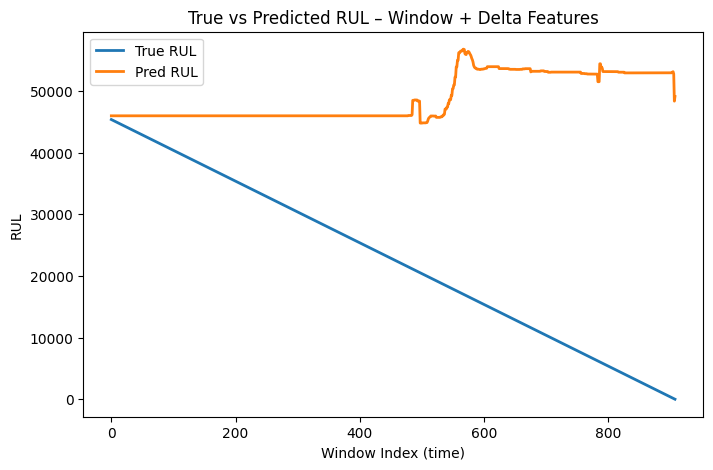

In [46]:
feature_cols = [
    "cycle_window",
    "strain_mean_of_means_mean",
    "pzt_amplitude_std_mean",
    "D_smooth_mean",
    "strain_mean_of_means_std",
    "pzt_amplitude_std_std",
    "D_smooth_std",
    "strain_mean_of_means_mean_delta",
    "pzt_amplitude_std_mean_delta",
    "D_smooth_mean_delta"
]

df_ready = agg[feature_cols + ["RUL_mean"]].dropna()

X = df_ready[feature_cols]
y = df_ready["RUL_mean"]

split_idx = int(len(df_ready) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

model = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=6,
    max_iter=400,
    random_state=42
)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"Window + Δ Model → RMSE:{rmse:.2f}, MAE:{mae:.2f}, R²:{r2:.3f}")

plt.figure(figsize=(8,5))
plt.plot(y_test.values, label="True RUL", linewidth=2)
plt.plot(y_pred, label="Pred RUL", linewidth=2)
plt.xlabel("Window Index (time)")
plt.ylabel("RUL")
plt.title("True vs Predicted RUL – Window + Delta Features")
plt.legend()
plt.show()


In [47]:
# add this before training
agg['progress_frac'] = agg['cycle_window'] / agg['cycle_window'].max()

Window + Δ + progress_frac → RMSE:30844.83, MAE:26234.56, R²:-4.539


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


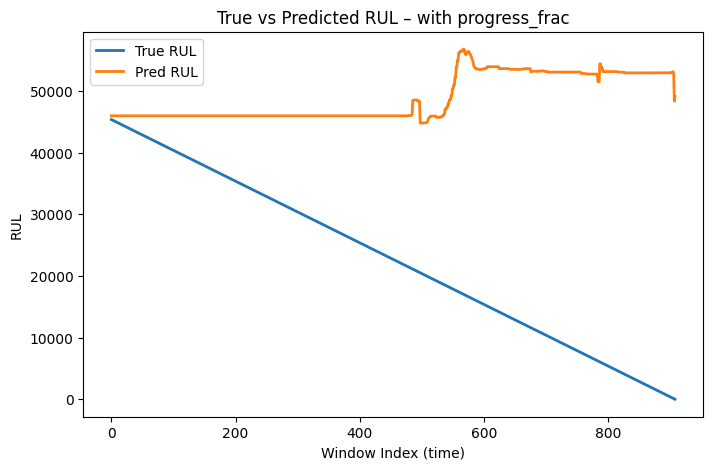

In [48]:
feature_cols = [
    "progress_frac",
    "strain_mean_of_means_mean",
    "pzt_amplitude_std_mean",
    "D_smooth_mean",
    "strain_mean_of_means_std",
    "pzt_amplitude_std_std",
    "D_smooth_std",
    "strain_mean_of_means_mean_delta",
    "pzt_amplitude_std_mean_delta",
    "D_smooth_mean_delta"
]

df_ready = agg[feature_cols + ["RUL_mean"]].dropna()

X = df_ready[feature_cols]
y = df_ready["RUL_mean"]

split_idx = int(len(df_ready) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

model = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=6,
    max_iter=400,
    random_state=42
)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"Window + Δ + progress_frac → RMSE:{rmse:.2f}, MAE:{mae:.2f}, R²:{r2:.3f}")

plt.figure(figsize=(8,5))
plt.plot(y_test.values, label="True RUL", linewidth=2)
plt.plot(y_pred, label="Pred RUL", linewidth=2)
plt.xlabel("Window Index (time)")
plt.ylabel("RUL")
plt.title("True vs Predicted RUL – with progress_frac")
plt.legend()
plt.show()


In [49]:
from sklearn.linear_model import LinearRegression
X = df_L1[['cycle']]
y = df_L1['RUL']
model = LinearRegression().fit(X, y)
print(model.score(X, y))

0.37609920184677126


In [50]:
import numpy as np
print(np.corrcoef(df_L1['cycle'], df_L1['RUL'])[0,1])

-0.6132692735224644


In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression()
)
model.fit(df_L1[['cycle']], df_L1['RUL'])
pred = model.predict(df_L1[['cycle']])
print(pred)

[151487.78277407 151487.78277407 151487.78277407 ...   2511.21220868
   2510.07074532   2508.92927023]


In [53]:
df_L1.corr(numeric_only=True)['RUL'].sort_values(ascending=False)


RUL                           1.000000
strain_std_of_means           0.398353
pzt_amplitude_std             0.395801
mean_amplitude                0.393518
strain_mean_of_means          0.382459
pzt_energy_mean               0.340618
rho_smooth                    0.316660
D_smooth                      0.154668
D_macro                       0.148218
D_smooth_delta                0.029935
strain_mean_of_means_delta   -0.005130
pzt_amplitude_std_delta      -0.100184
pzt_rms_mean                 -0.101884
median_strain                -0.123047
load                         -0.331216
rho_micro                    -0.384036
cycle_window                 -0.613269
cycle                        -0.613269
Name: RUL, dtype: float64

In [54]:
import numpy as np
import pandas as pd

# choose the most informative features
features = [
    'strain_std_of_means',
    'pzt_amplitude_std',
    'mean_amplitude',
    'strain_mean_of_means',
    'pzt_energy_mean',
    'rho_smooth',
    'D_smooth',
    'D_macro',
    'load'
]

target = 'RUL'

# ensure sorting by cycle
df_L1 = df_L1.sort_values('cycle').reset_index(drop=True)


In [56]:
def make_sliding_windows(df, features, target, window_size=50):
    X, y = [], []
    values = df[features].values
    target_vals = df[target].values

    for i in range(window_size, len(df)):
        X.append(values[i - window_size:i])  # 50-cycle window
        y.append(target_vals[i])             # RUL at current cycle
    return np.array(X), np.array(y)


In [57]:
window_size = 50
X, y = make_sliding_windows(df_L1, features, target, window_size)

print("Shape of X:", X.shape)  # (samples, window_size, n_features)
print("Shape of y:", y.shape)


Shape of X: (391522, 50, 9)
Shape of y: (391522,)


In [58]:
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [ ]:
# === Imports ===
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# === 1. Model architecture ===
n_timesteps = X_train.shape[1]   # e.g., 50
n_features  = X_train.shape[2]   # e.g., 9

model = keras.Sequential([
    layers.Input(shape=(n_timesteps, n_features)),
    layers.LSTM(64, return_sequences=False),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='mse'
)

# === 2. Training ===
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    verbose=1
)

# === 3. Prediction & Evaluation ===
y_pred = model.predict(X_test).flatten()

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"LSTM Model → RMSE:{rmse:.2f}, MAE:{mae:.2f}, R²:{r2:.3f}")

# === 4. Plot ===
plt.figure(figsize=(8,5))
plt.plot(y_test, label='True RUL', linewidth=2)
plt.plot(y_pred, label='Predicted RUL', linewidth=2)
plt.xlabel("Cycle (test sequence index)")
plt.ylabel("RUL")
plt.title("LSTM – True vs Predicted RUL")
plt.legend()
plt.show()
